# Image Watermarking App

### In this project we will see how we will add watermark to an image. Adding a watermark works as a copyright for your image, so that no one can illegally use your image or document. We will use OpenCV for this project to add logo and text as watermark. 

In [1]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO

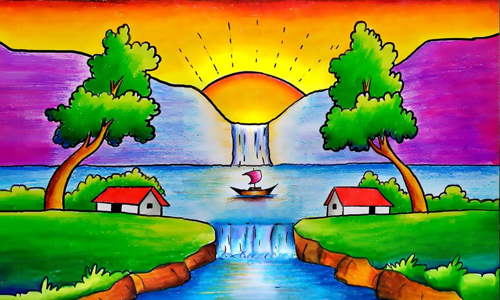

In [19]:
image = Image.open(BytesIO(requests.get("https://i.pinimg.com/originals/23/b9/4b/23b94bfecddc840c0ab5c4eaeaeeb974.jpg").content))
image_logo = image.resize((500,300))
text_logo = image.resize((500,300))
image_logo

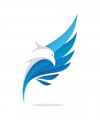

In [11]:
logo = Image.open(BytesIO(requests.get('https://i.pinimg.com/736x/0d/cf/b5/0dcfb548989afdf22afff75e2a46a508.jpg').content))
logo = logo.resize((100, 120))
logo

### Inorder to use the image and logo we need to convert them into RGB and get the shape i.e  height, width of the image.

In [12]:
image_logo = np.array(image_logo.convert('RGB'))
h_image, w_image, _ = image_logo.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

### We will be placing the watermark at the center of the image so finding the center

In [13]:
centre_y = int(h_image/2)         # 300/2 = 150
centre_x = int(w_image/2)         # 500/2 = 250
top_y = centre_y - int(h_logo/2)  # 150 - 60 = 90
bottom_y = top_y + h_logo         # 90 + 120 = 210
left_x = centre_x- int(w_logo/2)  # 250 - 50 = 200 
right_x = left_x + w_logo         # 200 + 100 = 300 
# centre(250,150), top_left(200, 90), top_right(300,90), bottom_left(200,210), bottom_right(300, 210)

### Getting the Region of Interest(ROI)
### Region of Interest is the place on the image where you want to place the watermark. We can find the ROI by the points we found above 

In [14]:
roi = image_logo[top_y:bottom_y,left_x:right_x]
# Adding the logo to the roi
result = cv2.addWeighted(roi, 1, logo, 1 ,0)
# Drawing
cv2.line(image_logo, (0, centre_y),(left_x, centre_y),(0,0 ,255), 1)
cv2.line(image_logo, (right_x, centre_y), (w_image, centre_y), (0, 0, 255), 1)
# Replace the ROI on the Image
image_logo[top_y:bottom_y,left_x:right_x] = result

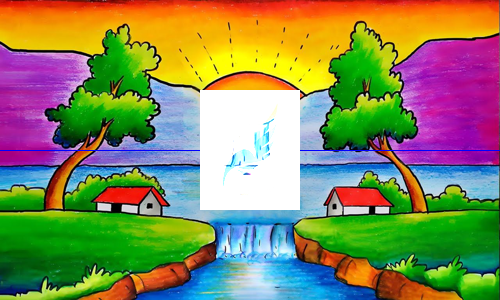

In [16]:
img = Image.fromarray(image_logo, 'RGB')
img

### Put Text as a Watermark

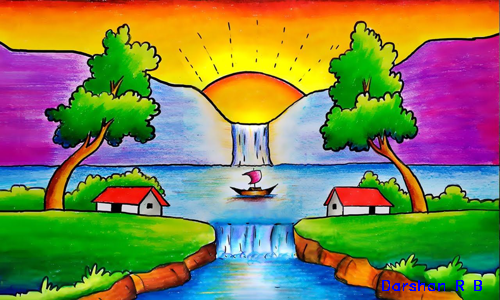

In [32]:
image = Image.open(BytesIO(requests.get("https://i.pinimg.com/originals/23/b9/4b/23b94bfecddc840c0ab5c4eaeaeeb974.jpg").content))
text_logo = image.resize((500,300))
text_logo = np.array(text_logo.convert('RGB'))
cv2.putText(text_logo, text= 'Darshan R B', 
            org=(w_image-120, h_image-10), 
            fontFace=cv2.FONT_HERSHEY_DUPLEX, 
            fontScale=0.5, color = (0,0,255), 
            thickness=1, lineType=cv2.LINE_4)
text_elogo = Image.fromarray(text_logo, 'RGB')
text_elogo

## Conclusion

### Adding a watermark to an image as an copyright. Different organisations can use it to make their content secure so that their cannot be misused without their license or a paid version. In this project we saw how easily we can use OpenCV to add watermark to our images